# Plot zostoga from CMIP5 and CMIP6

In [1]:
import sys

import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

sys.path.append('../code/')
import mod_loc as loc

In [2]:
data_dir = '../outputs/'

In [3]:
cmip6 = xr.open_dataset(data_dir+'CMIP6_SeaLevel_ssp585_zostoga_1986_2100.nc')
cmip6

<xarray.Dataset>
Dimensions:            (model: 14, time: 114)
Coordinates:
  * model              (model) object 'MIROC6' 'MPI-ESM1-2-HR' ... 'MRI-ESM2-0'
  * time               (time) float64 1.986e+03 1.988e+03 ... 2.098e+03 2.1e+03
Data variables:
    zostoga_corrected  (model, time) float64 ...
    trend_piControl    (model, time) float64 ...
Attributes:
    source_file:    This NetCDF file was built from ComputeGlobalThermalExpan...
    creation_date:  2020-08-23 09:45

In [4]:
loc.print_results_da(cmip6.zostoga_corrected)

Mean and 5-95 percentile range: 
Year 2099
0.3166168706613754 [ 0.23171150795777806 - 0.4015222333649727 ]
Year 2081-2099
0.26982969487561004 [ 0.19887803325977574 - 0.3407813564914443 ]


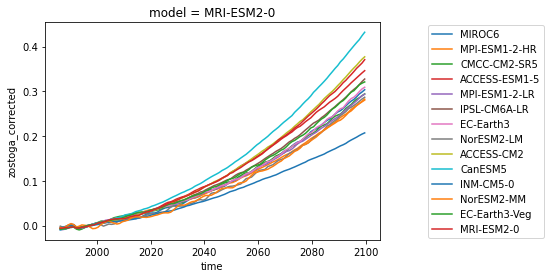

In [5]:
fig, axes = plt.subplots(ncols=1)
for mod in cmip6.model:
    cmip6.zostoga_corrected.sel(model=mod).plot(ax=axes, label=mod.values)
fig.legend(loc='center left', bbox_to_anchor=(1, 0.5))

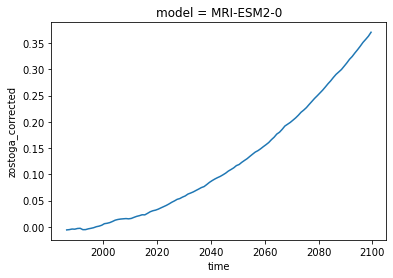

In [88]:
cmip6.zostoga_corrected.sel(model='MRI-ESM2-0').plot()

In [91]:
cmip6['zostoga_corrected'] = xr.where((cmip6.zostoga_corrected.coords['model'] == 'MRI-ESM2-0') & 
                                      (cmip6.zostoga_corrected.coords['time'] >= 2050), 
                                      cmip6.zostoga_corrected+0.02, cmip6.zostoga_corrected)


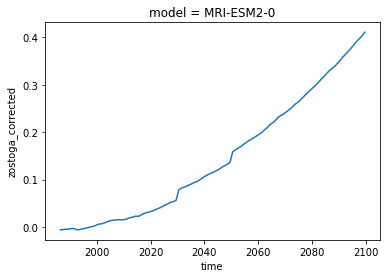

In [92]:
cmip6.zostoga_corrected.sel(model='MRI-ESM2-0').plot()

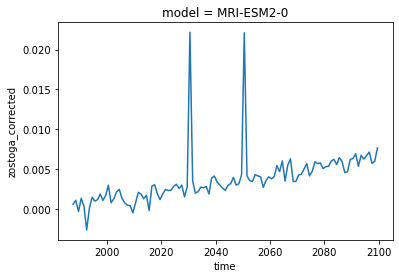

In [93]:
cmip6['zostoga_corrected'].sel(model='MRI-ESM2-0').diff('time').plot()

In [94]:
diff = cmip6['zostoga_corrected'].sel(model='MRI-ESM2-0').diff('time')
ind = np.where( diff > 0.02)[0][0]

In [49]:
cmip6['zostoga_corrected'].sel(model='MRI-ESM2-0').isel(time=ind)

<xarray.DataArray 'zostoga_corrected' ()>
array(0.05652534)
Coordinates:
    model    <U10 'MRI-ESM2-0'
    time     float64 2.03e+03

In [50]:
cmip6['zostoga_corrected'].sel(model='MRI-ESM2-0').isel(time=ind+1)

<xarray.DataArray 'zostoga_corrected' ()>
array(0.07869119)
Coordinates:
    model    <U10 'MRI-ESM2-0'
    time     float64 2.03e+03

In [95]:
def remove_discontinuities_da(da, gap):
    '''Remove discontinuities in a time series, numpy or data array.
    da: The input data
    gap: the maximum gap allowed in the data above which the 
    discontinuity is removed'''
    
    diff = da.diff('time')
    indpb = np.where(np.abs(diff) > gap)[0]
    print("### Removing discontinuities at these indices: ####")
    print(indpb)
    for k in indpb:
        da[k+1:] = da[k+1:] - da[k+1] + da[k]
    return da

def remove_discontinuities(da, gap):
    '''Remove discontinuities in a time series, numpy or data array.
    da: The input data
    gap: the maximum gap allowed in the data above which the 
    discontinuity is removed'''
    
    da_out = da.copy()
    if isinstance(da, xr.DataArray):
        diff = da.diff('time')
    elif isinstance(da, np.ndarray):
        diff = np.array(da[1:]) - np.array(da[:-1])
    else:
        print('ERROR: Input object type not supported')
        
    indpb = np.where(np.abs(diff) > gap)[0]
    print("### Removing discontinuities at these indices: ####")
    print(indpb)
    for k in indpb:
        da_out[k+1:] = da[k+1:] - da[k+1] + da[k]
    return da_out

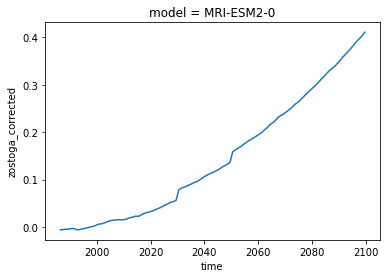

In [100]:
test_da = cmip6['zostoga_corrected'].sel(model='MRI-ESM2-0').copy()
test_da.plot()

In [101]:
new_da = remove_discontinuities_da(test_da, 0.02)

### Removing discontinuities at these indices: ####
[43 63]


In [98]:
new_da

<xarray.DataArray 'zostoga_corrected' (time: 114)>
array([-6.06478165e-03, -5.47227795e-03, -4.37783981e-03, -4.68344772e-03,
       -3.33758602e-03, -2.97055924e-03, -5.58655867e-03, -5.48833021e-03,
       -4.01694857e-03, -3.02088418e-03, -1.84382282e-03,  3.66813699e-05,
        1.12228684e-03,  2.83811831e-03,  5.81529208e-03,  6.60101914e-03,
        7.89715567e-03,  1.00394844e-02,  1.25129990e-02,  1.38502851e-02,
        1.46442115e-02,  1.51130653e-02,  1.55491553e-02,  1.50628969e-02,
        1.58554375e-02,  1.79386384e-02,  1.98184386e-02,  2.11001210e-02,
        2.28162765e-02,  2.26293303e-02,  2.55000278e-02,  2.85527132e-02,
        3.04894805e-02,  3.16719360e-02,  3.35621297e-02,  3.60169656e-02,
        3.83533224e-02,  4.06999238e-02,  4.35280114e-02,  4.66361217e-02,
        4.92216259e-02,  5.22155635e-02,  5.37495971e-02,  5.65253370e-02,
        5.65253370e-02,  6.00747004e-02,  6.20670490e-02,  6.42536789e-02,
        6.70045041e-02,  6.96691707e-02,  7.25022279e-02,  7.43951410e-02,
        7.82865234e-02,  8.24259803e-02,  8.58031385e-02,  8.88292849e-02,
        9.14539047e-02,  9.37990085e-02,  9.67672639e-02,  9.99541939e-02,
        1.03921855e-01,  1.06925814e-01,  1.10088231e-01,  1.14372438e-01,
        1.36538288e-01,  1.40710439e-01,  1.44273668e-01,  1.47723499e-01,
        1.52040622e-01,  1.56197960e-01,  1.60234778e-01,  1.62954154e-01,
        1.66539184e-01,  1.70582871e-01,  1.74368962e-01,  1.78420949e-01,
        1.83861486e-01,  1.88557277e-01,  1.94590568e-01,  1.98089483e-01,
        2.03592992e-01,  2.09890823e-01,  2.13341071e-01,  2.16813165e-01,
        2.21076480e-01,  2.25440378e-01,  2.30467110e-01,  2.36160400e-01,
        2.40316845e-01,  2.45043467e-01,  2.50965639e-01,  2.56658959e-01,
        2.62444577e-01,  2.67516817e-01,  2.72840380e-01,  2.78190705e-01,
        2.84207887e-01,  2.90446918e-01,  2.96031310e-01,  3.02482474e-01,
        3.08414481e-01,  3.12986429e-01,  3.17674308e-01,  3.23900166e-01,
        3.30224372e-01,  3.37160061e-01,  3.42518552e-01,  3.49253315e-01,
        3.55518214e-01,  3.62230743e-01,  3.69373261e-01,  3.75101718e-01,
        3.81084330e-01,  3.88744812e-01])
Coordinates:
    model    <U10 'MRI-ESM2-0'
  * time     (time) float64 1.986e+03 1.988e+03 1.988e+03 ... 2.098e+03 2.1e+03

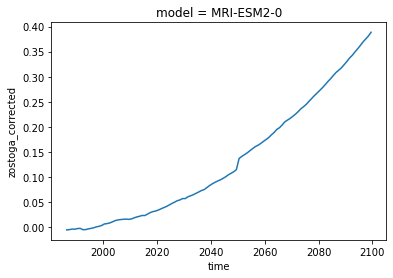

In [99]:
new_da.plot()

In [104]:
new_da = new_da.rename({'time':'year'})
new_da

<xarray.DataArray 'zostoga_corrected' (year: 114)>
array([-6.06478165e-03, -5.47227795e-03, -4.37783981e-03, -4.68344772e-03,
       -3.33758602e-03, -2.97055924e-03, -5.58655867e-03, -5.48833021e-03,
       -4.01694857e-03, -3.02088418e-03, -1.84382282e-03,  3.66813699e-05,
        1.12228684e-03,  2.83811831e-03,  5.81529208e-03,  6.60101914e-03,
        7.89715567e-03,  1.00394844e-02,  1.25129990e-02,  1.38502851e-02,
        1.46442115e-02,  1.51130653e-02,  1.55491553e-02,  1.50628969e-02,
        1.58554375e-02,  1.79386384e-02,  1.98184386e-02,  2.11001210e-02,
        2.28162765e-02,  2.26293303e-02,  2.55000278e-02,  2.85527132e-02,
        3.04894805e-02,  3.16719360e-02,  3.35621297e-02,  3.60169656e-02,
        3.83533224e-02,  4.06999238e-02,  4.35280114e-02,  4.66361217e-02,
        4.92216259e-02,  5.22155635e-02,  5.37495971e-02,  5.65253370e-02,
        5.65253370e-02,  6.00747004e-02,  6.20670490e-02,  6.42536789e-02,
        6.70045041e-02,  6.96691707e-02,  7.25022279e-02,  7.43951410e-02,
        7.82865234e-02,  8.24259803e-02,  8.58031385e-02,  8.88292849e-02,
        9.14539047e-02,  9.37990085e-02,  9.67672639e-02,  9.99541939e-02,
        1.03921855e-01,  1.06925814e-01,  1.10088231e-01,  1.14372438e-01,
        1.14372438e-01,  1.18544588e-01,  1.22107817e-01,  1.25557648e-01,
        1.29874772e-01,  1.34032110e-01,  1.38068928e-01,  1.40788304e-01,
        1.44373334e-01,  1.48417021e-01,  1.52203111e-01,  1.56255099e-01,
        1.61695635e-01,  1.66391427e-01,  1.72424717e-01,  1.75923633e-01,
        1.81427142e-01,  1.87724973e-01,  1.91175221e-01,  1.94647314e-01,
        1.98910630e-01,  2.03274528e-01,  2.08301260e-01,  2.13994550e-01,
        2.18150994e-01,  2.22877617e-01,  2.28799789e-01,  2.34493109e-01,
        2.40278727e-01,  2.45350967e-01,  2.50674529e-01,  2.56024855e-01,
        2.62042037e-01,  2.68281067e-01,  2.73865460e-01,  2.80316623e-01,
        2.86248630e-01,  2.90820579e-01,  2.95508458e-01,  3.01734316e-01,
        3.08058521e-01,  3.14994211e-01,  3.20352702e-01,  3.27087464e-01,
        3.33352363e-01,  3.40064893e-01,  3.47207411e-01,  3.52935868e-01,
        3.58918479e-01,  3.66578961e-01])
Coordinates:
    model    <U10 'MRI-ESM2-0'
  * year     (year) float64 1.986e+03 1.988e+03 1.988e+03 ... 2.098e+03 2.1e+03

In [75]:
isinstance(a, np.ndarray)

True

In [74]:
type(a)

numpy.ndarray